# BANKING: ESTUDIO DE LA SUSCRIPCIÓN A UN DEPOSITO A PLAZO

## OVERVIEW

### Contexto
Los depósitos a plazo son una fuente importante de ingresos para un banco. Un depósito a plazo es una inversión en efectivo mantenida en una institución financiera. Su dinero se invierte por una tasa de interés acordada durante un período fijo de tiempo o plazo. El banco tiene varios planes de divulgación para vender depósitos a plazo a sus clientes, como marketing por correo electrónico, anuncios, marketing telefónico y marketing digital.

Las campañas de marketing telefónico siguen siendo una de las formas más efectivas de llegar a las personas. Sin embargo, requieren una gran inversión, ya que se contratan grandes centros de llamadas para ejecutar estas campañas. Por lo tanto, es crucial identificar a los clientes con más probabilidades de convertir de antemano para que puedan ser dirigidos específicamente a través de una llamada.

Los datos están relacionados con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo de la clasificación es predecir si el cliente se suscribirá a un depósito a plazo (variable y)

### Datos
Los datos están relacionados con las campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para determinar (depósito bancario) sería suscrito por el cliente o no.
Disponemos de dos conjuntos de datos:

train.csv: 45.211 filas y 17 columnas ordenadas por fecha (de mayo de 2008 a noviembre de 2010)
test.csv: 4521 filas y 17 columnas con el 10% de los ejemplos (4521), seleccionados aleatoriamente de train.csv

#### Dataset Bank client data: Variables

1 - age (numérica)

2 - job : tipo de trabajo (categórica)
Valores: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services"

*Traducción en Español: "admin.","desconocido","desempleado","gestión","empleada doméstica","empresario","estudiante",  "obrero","autónomo","jubilado","técnico","servicios"*

3 - marital :  estado civil (categórica)
Valores: "married","divorced","single"
*Traducción: "casado", "divorciado", "soltero"*

*Nota: "divorciado" significa divorciado o viudo*

4 - education (categórica)
Valores: "unknown","secondary","primary","tertiary"
*Traducción: "desconocido", "secundario", "primario", "terciario"*

5 - default: Incumplimiento, ¿tiene mora de cédito? (categórica binaria)
Valores: "yes", "no"

6 - balance: Saldo medio anual, en euros (numérica)

7 - housing: Vivienda, ¿tiene algún prestamo hipotecario? (categórica binaria)
Valores: "yes", "no"

8 - loan: prestamo, ¿tiene algún préstamo personal? (categórica binaria)
Valores: "yes", "no"

**Relacionadas con el último contacto de la campaña actual:**

9 - contact: tipo de contacto en la comunicación (categórica)
Valores:"unknown","telephone","cellular"
*Traducción: "desconocido", "telefónica por cable" (fijo),"telefónica sin cable" (movil)*

10 - day: último contacto, día del mes (numérica)

11 - month: último mes de contacto (categórica)
Valores: "jan", "feb", "mar", …, "nov", "dec"

12 - duration: duración del último contacto, en segundos (numérica)

13 - campaign: número de contactos realizados durante esta campaña y para este cliente (numérica)
*Nota: Incluye el último contacto*

**Otras variables: relacionadas con campañas previas**

14 - pdays: número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (numérica)
*Nota: -1 significa que el cliente no fue contactado previamente*

15 - previous: número de contactos totales realizados antes de esta campaña y para este cliente (numérica)

16 - poutcome: resultado de la campaña de marketing anterior (categórica)
Valores: "unknown","other","failure","success"
*Traducción: "desconocido", "otro", "fracaso", "éxito"*

**Variable respuesta:**

17 - subscribed: ¿El cliente ha suscrito un depósito a plazo? (categórica binaria)
Valores: "yes","no"



*NOTA: Este conjunto de datos está disponible públicamente para la investigación. Se ha recogido del aprendizaje automático de la UCI con muestreo aleatorio y algunas columnas adicionales.*


## EDA

### Estudio inicial del dataset

Importación de librerías que vamos a usar en el proyecto

In [1]:
#TRATAMIENTO DE DATOS
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
#MODELOS
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
#GRAFICOS
import seaborn as sns
from matplotlib import pyplot as plt

Carga de los datos

In [2]:
train = pd.read_csv('./Data/train.csv', sep=';')
test = pd.read_csv("./Data/test.csv", sep=';')

In [3]:
train.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
test.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Renombramos la columna "y". Es la variable respuesta, subscribed, así que renombramos esta columna:

In [5]:
train = train.rename(columns={"y": "subscribed"})
test = test.rename(columns={"y": "subscribed"})

In [6]:
train.shape, test.shape

((45211, 17), (4521, 17))

Tenemos 45211 registros en train y 4521 en test y 17 variables

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  int64 
 10  month       45211 non-null  object
 11  duration    45211 non-null  int64 
 12  campaign    45211 non-null  int64 
 13  pdays       45211 non-null  int64 
 14  previous    45211 non-null  int64 
 15  poutcome    45211 non-null  object
 16  subscribed  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         4521 non-null   int64 
 1   job         4521 non-null   object
 2   marital     4521 non-null   object
 3   education   4521 non-null   object
 4   default     4521 non-null   object
 5   balance     4521 non-null   int64 
 6   housing     4521 non-null   object
 7   loan        4521 non-null   object
 8   contact     4521 non-null   object
 9   day         4521 non-null   int64 
 10  month       4521 non-null   object
 11  duration    4521 non-null   int64 
 12  campaign    4521 non-null   int64 
 13  pdays       4521 non-null   int64 
 14  previous    4521 non-null   int64 
 15  poutcome    4521 non-null   object
 16  subscribed  4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [9]:
train.isna().sum()
test.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

No hay datos NaN en los datasets

*NOTA: a partir de este punto del conjunto de datos test nos olvidamos hasta el final del proyecto, que lo usaremos para probar los modelos*

In [10]:
train.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


- La edad mínima para participar en el estudio es 18 años. Aproximadamente, el 50% de los clientes tiene 40 años o más y sólo un 25% supera los 48 años.

- El balance anual medio es 1362€, pero el mediano es 448, por ello, deducimos que hay pocos clientes con balances muy elevados que hacen que suba la media. Esta variable no tendrá una distribución normal y además tiene un desviación estándar, muy grande, valores muy dispersos.

- Más de la mitad de los clientes son gente casada con hipoteca, pero sin préstamo personal.

- En cuanto a la campaña realizada, la mayoría con contactados por cellular (movil), entorno al día 15 y ha recibido 2 impactos en esta campaña.

- De campañas previas en general tenemos poca información, ya que parece que en general estos clientes no han recibido campañas previamente a esta.

Nos planteamos quitar las variables que dan información sobre campñas previas (pdays, previous y poutcome).
Como sabemos que pdays toma valor -1 cuando no se ha realizado una campaña previa a la actual (por definición de las variables del dataset)
vamos a ver si las otras dos variables, previous y poutcome toman valores por defecto cuando no hay campaña, porque entonces serían variables útiles.

In [11]:
train[train.pdays==-1].groupby('previous').poutcome.count()

previous
0    36954
Name: poutcome, dtype: int64

In [12]:
train[train.pdays!=-1].groupby('previous').poutcome.count()

previous
1      2772
2      2106
3      1142
4       714
5       459
6       277
7       205
8       129
9        92
10       67
11       65
12       44
13       38
14       19
15       20
16       13
17       15
18        6
19       11
20        8
21        4
22        6
23        8
24        5
25        4
26        2
27        5
28        2
29        4
30        3
32        1
35        1
37        2
38        2
40        1
41        1
51        1
55        1
58        1
275       1
Name: poutcome, dtype: int64

In [13]:
train[train.pdays==-1].groupby('poutcome').poutcome.count()

poutcome
unknown    36954
Name: poutcome, dtype: int64

In [14]:
train[train.pdays!=-1].groupby('poutcome').poutcome.count()

poutcome
failure    4901
other      1840
success    1511
unknown       5
Name: poutcome, dtype: int64

Viendo los resultados, parece que las variables podrían usarse, ya que no son valores desconocidos. Sino que implican que no se ha recibido campaña. Vamos a tratar poutcome:
 vamos a transformar los valores desconocidos cuando hay campaña en "other" por ser la categoría que más se ajusta al no saber el resultado y ser una categoría abierta y en el caso de que no haya campaña pondremos "no contact"

Hay clientes con saldos anuales negativos. Estudiamos su perfil:

In [15]:
train[train.balance<0].describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,3766.000000,3766,3766,3766,3766,3766.000000,3766,3766,3766,3766.000000,3766,3766.000000,3766.000000,3766.000000,3766.000000,3766,3766
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,1110,2202,2311,3326,NaN,2738,2556,2163,NaN,1664,NaN,NaN,NaN,NaN,3278,3556
mean,39.480351,NaN,NaN,NaN,NaN,-317.677642,NaN,NaN,NaN,16.439724,NaN,252.096389,2.926713,35.314126,0.406798,NaN,NaN
std,9.068517,NaN,NaN,NaN,NaN,368.994983,NaN,NaN,NaN,8.578670,NaN,250.280003,3.474046,99.970675,1.609466,NaN,NaN
min,20.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,-422.000000,NaN,NaN,NaN,9.000000,NaN,105.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,38.000000,NaN,NaN,NaN,NaN,-230.000000,NaN,NaN,NaN,16.000000,NaN,176.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,46.000000,NaN,NaN,NaN,NaN,-93.000000,NaN,NaN,NaN,24.000000,NaN,305.000000,3.000000,-1.000000,0.000000,NaN,NaN


Vemos que hay clientes con balance de saldo anual negativos, en concreto, 3766 clientes. Estos clientes con saldos negativos se caracterizan por tener una edad media que ronda los 40 años, con hipoteca, casados y de clase obrera.
Entorno al 75% de estos clientes tiene saldo negativo inferior a 400€. De estos clientes sólo un 9% suscribe el crédito, la proporción es menor que si tienen mayor balance (un balance anual superior a 500€ arroja un 16% de aceptación del crédito).

### Codificación de variables

Esta parte la aplicaré a ambos conjuntos de datos (train y test), pero a test no lo haré hasta que no haya acabado de entrenar los modelos para no sobre ajustar y poder evaluar correctamente los modelos.

In [16]:
#Me creo dataset de trabajo a codificar
df =train
#df=test

Empezamos corrigiendo las variables poutcome. Lo hacemos tanto en train para ver el análisis de variables posterior correctamente como en df para tenerlo en el dataset que vamos a generar codificado para entrenar los modelos

Primero ponemos con valor "other" los valores "unkonown" cuando si hay campaña previa y "no contact" cuando no la hay

In [17]:
train.loc[(train.pdays != -1) & (train.poutcome == "unknown"),"poutcome"] = 'other'
df.loc[(df.pdays != -1) & (df.poutcome == "unknown"),"poutcome"] = 'other'
train.loc[(train.pdays == -1) & (train.poutcome == "unknown"),"poutcome"] = 'no contact'
df.loc[(df.pdays == -1) & (df.poutcome == "unknown"),"poutcome"] = 'no contact'

Variable Job

In [18]:
ohe = OneHotEncoder(sparse = False)
df_encoded = pd.concat((df, pd.DataFrame(ohe.fit_transform(df["job"].to_frame()),columns = "job_" +
np.sort(df["job"].unique()))),axis = 1)
df_encoded.drop(columns = ["job"],inplace = True)

Variable Marital (estado civil)

In [19]:
df_encoded = pd.concat((df_encoded , pd.DataFrame(ohe.fit_transform(df_encoded["marital"].to_frame()),columns = "marital_" +                       np.sort(df_encoded["marital"].unique()))),axis = 1)
df_encoded .drop(columns = ["marital"],inplace = True)

Variable Education

In [20]:
df_encoded.loc[(df_encoded.education == "tertiary"),"education"] = 3
df_encoded.loc[(df_encoded.education == "secondary") ,"education"] = 2
df_encoded.loc[(df_encoded.education == "primary"),"education"] = 1
df_encoded.loc[(df_encoded.education == "unknown"),"education"] = 0

Variable poutcome: en este caso decidimos clasificar 0 como fracaso y 1 como éxito y agrupar otros resultados y desconocido con un valor por defecto (999)Variable poutcome: en este caso decidimos clasificar 0 como fracaso y 1 como éxito y agrupar otros resultados y desconocido con un valor por defecto (999)


In [21]:
#train[train.pdays==-1].groupby('poutcome').poutcome.count()
train.loc[(train.pdays != -1) & (train.poutcome == "unknown"),"poutcome"] = 'other'

In [22]:
df_encoded.loc[(df_encoded.poutcome == "failure") ,"poutcome"] = 0
df_encoded.loc[(df_encoded.poutcome == "success"),"poutcome"] = 1
df_encoded.loc[(df_encoded.poutcome == "no contact"),"poutcome"] = 999
df_encoded.loc[(df_encoded.poutcome == "other"),"poutcome"] = 2

Variables Categóricas dicotómicas

In [23]:
df_encoded.loc[(df_encoded.default == "yes"),"default"] = 1
df_encoded.loc[(df_encoded.default == "no") ,"default"] = 0

In [24]:
df_encoded.loc[(df_encoded.housing == "yes"),"housing"] = 1
df_encoded.loc[(df_encoded.housing == "no") ,"housing"] = 0

In [25]:
df_encoded.loc[(df_encoded.loan == "yes"),"loan"] = 1
df_encoded.loc[(df_encoded.loan == "no") ,"loan"] = 0

In [26]:
df_encoded.loc[(df_encoded.contact == "telephone"),"contact"] = 2
df_encoded.loc[(df_encoded.contact == "cellular") ,"contact"] = 1
df_encoded.loc[(df_encoded.contact == "unknown") ,"contact"] = 0

In [27]:
df_encoded.loc[(df_encoded.subscribed == "yes"),"subscribed"] = 1 # 0 means subscribed no 1 means yes
df_encoded.loc[(df_encoded.subscribed == "no") ,"subscribed"] = 0

In [28]:
df_encoded.info()
#Convierto variables tipo object a int, para facilitar su uso en los modelos
df_encoded.education = df_encoded.education.astype(int)
df_encoded.default = df_encoded.default.astype(int)
df_encoded.housing = df_encoded.housing.astype(int)
df_encoded.loan = df_encoded.loan.astype(int)
df_encoded.contact = df_encoded.contact.astype(int)
df_encoded.subscribed = df_encoded.subscribed.astype(int)
df_encoded.poutcome = df_encoded.poutcome.astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  int64  
 1   education          45211 non-null  object 
 2   default            45211 non-null  object 
 3   balance            45211 non-null  int64  
 4   housing            45211 non-null  object 
 5   loan               45211 non-null  object 
 6   contact            45211 non-null  object 
 7   day                45211 non-null  int64  
 8   month              45211 non-null  object 
 9   duration           45211 non-null  int64  
 10  campaign           45211 non-null  int64  
 11  pdays              45211 non-null  int64  
 12  previous           45211 non-null  int64  
 13  poutcome           45211 non-null  object 
 14  subscribed         45211 non-null  object 
 15  job_admin.         45211 non-null  float64
 16  job_blue-collar    452

**Viendo el análisis posterior (análisis de age como variable numérica) se decide tramificar la variable edad:**

In [29]:
df_encoded.loc[(df_encoded.age > 55),"age_group"] = "mayores de 55 años"
df_encoded.loc[(df_encoded.age >= 18) & (df_encoded.age <= 35),"age_group"] = "entre 18 y 35 años"
df_encoded.loc[(df_encoded.age > 35) & (df_encoded.age <= 55),"age_group"] = "entre 36 y 55 años"

Para el caso del dataset df_encoded para usar en los modelos codifico esta nueva variable de edad tramificada:

In [30]:
df_encoded = pd.concat((df_encoded , pd.DataFrame(ohe.fit_transform(df_encoded["age_group"].to_frame()),columns = "" +                       np.sort(df_encoded["age_group"].unique()))),axis = 1)
df_encoded.drop(columns = ["age_group"],inplace = True)
df_encoded

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,entre 18 y 35 años,entre 36 y 55 años,mayores de 55 años
0,58,3,0,2143,1,0,0,5,may,261,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,44,2,0,29,1,0,0,5,may,151,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,33,2,0,2,1,1,0,5,may,76,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,47,0,0,1506,1,0,0,5,may,92,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,33,0,0,1,0,0,0,5,may,198,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,0,825,0,0,1,17,nov,977,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
45207,71,1,0,1729,0,0,1,17,nov,456,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
45208,72,2,0,5715,0,0,1,17,nov,1127,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
45209,57,2,0,668,0,0,2,17,nov,508,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Hago lo mismo de tramificar la variable edad, pero para train para poder estudiar esta variable agrupada por categorias.

In [31]:
train.loc[(train.age > 55),"age_group"] = "mayores de 55 años"
train.loc[(train.age >= 18) & (train.age <= 35),"age_group"] = "entre 18 y 35 años"
train.loc[(train.age > 35) & (train.age <= 55),"age_group"] = "entre 36 y 55 años"
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no contact,no,mayores de 55 años
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no contact,no,entre 36 y 55 años
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no contact,no,entre 18 y 35 años
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no contact,no,entre 36 y 55 años
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,no contact,no,entre 18 y 35 años
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,no contact,yes,entre 36 y 55 años
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,no contact,yes,mayores de 55 años
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,mayores de 55 años
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,no contact,no,mayores de 55 años


In [32]:
df_encoded.loc[(df_encoded.month == "jan") ,"month_num"] = 1
df_encoded.loc[(df_encoded.month == "feb"),"month_num"] = 2
df_encoded.loc[(df_encoded.month == "mar"),"month_num"] = 3
df_encoded.loc[(df_encoded.month == "apr"),"month_num"] = 4
df_encoded.loc[(df_encoded.month == "may"),"month_num"] = 5
df_encoded.loc[(df_encoded.month == "jun"),"month_num"] = 6
df_encoded.loc[(df_encoded.month == "jul"),"month_num"] = 7
df_encoded.loc[(df_encoded.month == "aug"),"month_num"] = 8
df_encoded.loc[(df_encoded.month == "sep"),"month_num"] = 9
df_encoded.loc[(df_encoded.month == "oct"),"month_num"] = 10
df_encoded.loc[(df_encoded.month == "nov"),"month_num"] = 11
df_encoded.loc[(df_encoded.month == "dec"),"month_num"] = 12
df_encoded.drop(columns = ["month"],inplace = True)

In [33]:
df_encoded.head(3)

,age,education,default,balance,housing,loan,contact,day,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,entre 18 y 35 años,entre 36 y 55 años,mayores de 55 años,month_num
0,58,3,0,2143,1,0,0,5,261,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0
1,44,2,0,29,1,0,0,5,151,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0
2,33,2,0,2,1,1,0,5,76,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0


## Analisis de las Variables

### Análisis de Variables Categóricas

Estudio de la variable respuesta: Suscribe o no el depósito

In [34]:
colors = ['grey','green']

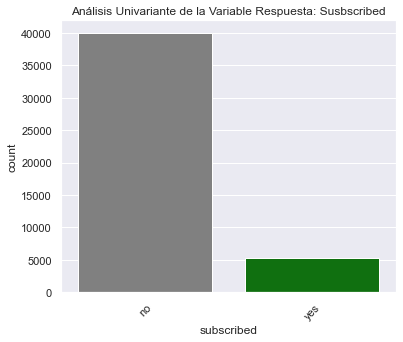

In [35]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
target = sns.countplot(x="subscribed", data = train, palette=colors, order = train["subscribed"].value_counts().index)
target.tick_params(axis='x', rotation=45)
plt.title("Análisis Univariante de la Variable Respuesta: Susbscribed")
plt.show()


In [36]:
#Creamos una tabla agrupada:
print('El porcentaje de clientes que suscriben el depósito es:', round(len(train[train.subscribed=='yes'])/len(train)*100,2),'%')

El porcentaje de clientes que suscriben el depósito es: 11.7 %


Un gran número de clientes no ha suscrito el depósito que ofrece el banco. Sólo un 11,7% lo han aceptado, por ello, tenemos un problema de variable respuesta poco balanceada.

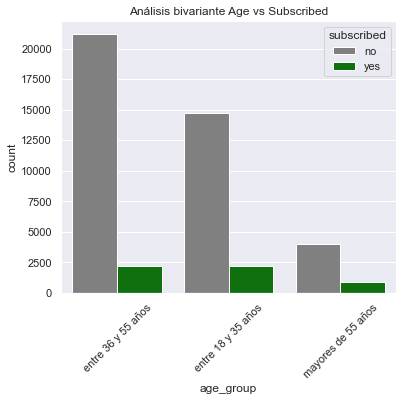

,age_group,subscribed_x,subscribed_y,proportion_subscribed
2,mayores de 55 años,906,4900,0.184898
0,entre 18 y 35 años,2189,16907,0.129473
1,entre 36 y 55 años,2194,23404,0.093745


In [37]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
job = sns.countplot(x="age_group", data = train, hue = "subscribed", palette=colors, order = train["age_group"].value_counts().index)
job.tick_params(axis='x', rotation=45)
plt.title("Análisis bivariante Age vs Subscribed")
plt.show()

#Sacamos tabla de proporción de depósitos subscritos
total=train.groupby(['age_group']).subscribed.count()
parcial=train[train.subscribed=='yes'].groupby(['age_group']).subscribed.count()

df_proportion_age = pd.merge(parcial, total, how='left', on=['age_group']).reset_index()
df_proportion_age['proportion_subscribed'] = df_proportion_age['subscribed_x'] / df_proportion_age['subscribed_y']
df_proportion_age.sort_values('proportion_subscribed', ascending=False)

Los que más créditos suscriben son los mayores de 55 (incluye a los jubilados), seguido de los menores de 35 (incluye estudiantes).

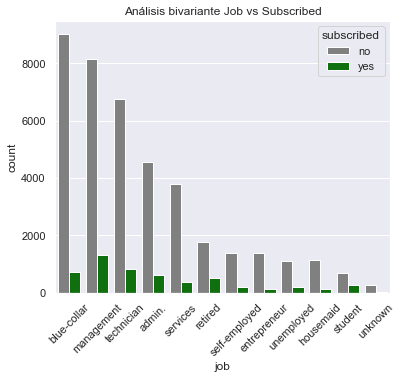

,job,subscribed_x,subscribed_y,proportion_subscribed
8,student,269,938,0.286780
5,retired,516,2264,0.227915
10,unemployed,202,1303,0.155027
4,management,1301,9458,0.137556
0,admin.,631,5171,0.122027
6,self-employed,187,1579,0.118429
11,unknown,34,288,0.118056
9,technician,840,7597,0.110570
7,services,369,4154,0.088830
3,housemaid,109,1240,0.087903


In [38]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
job = sns.countplot(x="job", data = train, hue = "subscribed", palette=colors, order = train["job"].value_counts().index)
job.tick_params(axis='x', rotation=45)
plt.title("Análisis bivariante Job vs Subscribed")
plt.show()

#Sacamos tabla de proporción de depósitos subscritos
total=train.groupby(['job']).subscribed.count()
parcial=train[train.subscribed=='yes'].groupby(['job']).subscribed.count()

df_proportion = pd.merge(parcial, total, how='left', on=['job']).reset_index()
df_proportion['proportion_subscribed'] = df_proportion['subscribed_x'] / df_proportion['subscribed_y']
df_proportion.sort_values('proportion_subscribed', ascending=False)


 Los estudiantes son los que más depósitos suscriben en proporción al número de clientes, seguido de los jubilados, desempleados y de puestos de gestión empresarial. Dentro de la gente que trabaja (la mayoría de los clientes), vemos que es más probable que personas con puestos de más alta escala accedan a abrir un depósito en el banco que obreros o empleados del sector servicios.

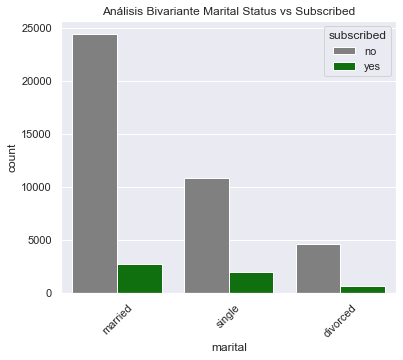

,marital,subscribed_x,subscribed_y,proportion_subscribed
2,single,1912,12790,0.149492
0,divorced,622,5207,0.119455
1,married,2755,27214,0.101235


In [39]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
marital = sns.countplot(x="marital", data = train, hue = "subscribed", palette=colors, order = train["marital"].value_counts().index)
marital.tick_params(axis='x', rotation=45)
plt.title("Análisis Bivariante Marital Status vs Subscribed")
plt.show()

#Sacamos tabla de proporción de depósitos subscritos
total=train.groupby(['marital']).subscribed.count()
parcial=train[train.subscribed=='yes'].groupby(['marital']).subscribed.count()

df_proportion_m = pd.merge(parcial, total, how='left', on=['marital']).reset_index()
df_proportion_m['proportion_subscribed'] = df_proportion_m['subscribed_x'] / df_proportion_m['subscribed_y']
df_proportion_m.sort_values('proportion_subscribed', ascending=False)

Se contacta mas con casados, que con solteros o divorciados, pero los casados son los que menos depósitos suscriben

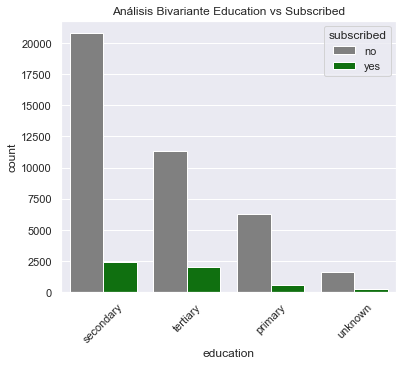

,education,subscribed_x,subscribed_y,proportion_subscribed
2,tertiary,1996,13301,0.150064
3,unknown,252,1857,0.135703
1,secondary,2450,23202,0.105594
0,primary,591,6851,0.086265


In [40]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
education = sns.countplot(x="education", data = train, hue = "subscribed",  palette=colors, order = train["education"].value_counts().index)
education.tick_params(axis='x', rotation=45)
plt.title("Análisis Bivariante Education vs Subscribed")
plt.show()

#Sacamos tabla de proporción de depósitos subscritos
total=train.groupby(['education']).subscribed.count()
parcial=train[train.subscribed=='yes'].groupby(['education']).subscribed.count()

df_proportion_e = pd.merge(parcial, total, how='left', on=['education']).reset_index()
df_proportion_e['proportion_subscribed'] = df_proportion_e['subscribed_x'] / df_proportion_e['subscribed_y']
df_proportion_e.sort_values('proportion_subscribed', ascending=False)

La gente con mayor educación suscribe más depósitos

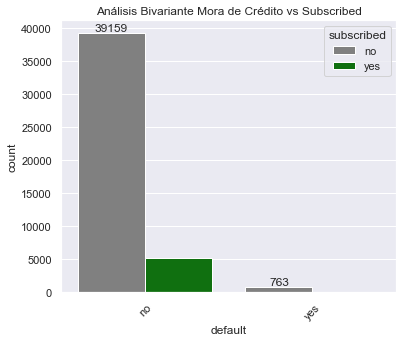

In [41]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
default = sns.countplot(x="default", data = train, hue = "subscribed",  palette=colors, order = train["default"].value_counts().index)
default.tick_params(axis='x', rotation=45)
default.bar_label(default.containers[0])

plt.title("Análisis Bivariante Mora de Crédito vs Subscribed")
plt.show()

Hay pocos clientes con mora de crédito y nunca suscriben el depósito. Sería un tipo de clientes claro para descartar en campañas de estos productos.

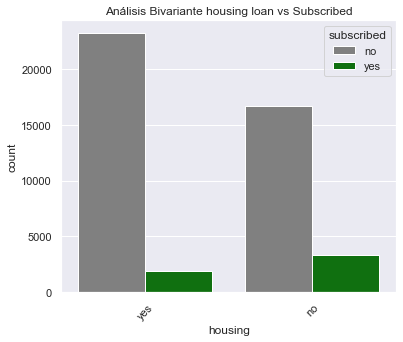

In [42]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
housing = sns.countplot(x="housing", data = train, hue = "subscribed",  palette=colors, order = train["housing"].value_counts().index)
housing.tick_params(axis='x', rotation=45)
plt.title("Análisis Bivariante housing loan vs Subscribed")
plt.show()

Relación inversa entre variables. La gente con crédito hipotecario es más contactada, pero suscriben menos depósitos de dinero

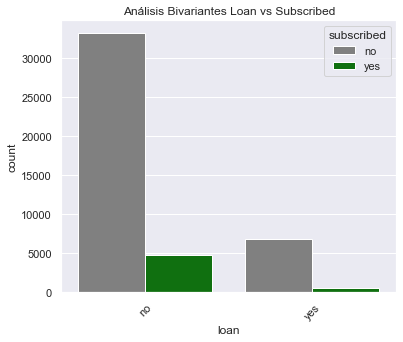

In [43]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
loan = sns.countplot(x="loan", data = train, hue = "subscribed",  palette=colors, order = train["loan"].value_counts().index)
loan.tick_params(axis='x', rotation=45)
plt.title("Análisis Bivariantes Loan vs Subscribed")
plt.show()

Los clientes con préstamo personal no suelen abrir depósitos en el banco, ni son fuente de interés, por ello, se les contacta menos.
Este sería otro grupo claro para descartar en las campañas (omitir clientes con préstamo personal)

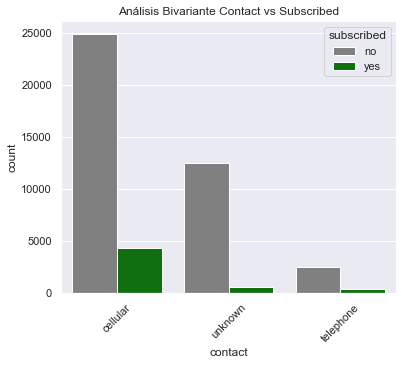

,contact,subscribed_x,subscribed_y,proportion_subscribed
0,cellular,4369,29285,0.149189
1,telephone,390,2906,0.134205
2,unknown,530,13020,0.040707


In [44]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
contact = sns.countplot(x="contact", data = train, hue = "subscribed", palette=colors, order = train["contact"].value_counts().index)
contact.tick_params(axis='x', rotation=45)
plt.title("Análisis Bivariante Contact vs Subscribed")
plt.show()

#Sacamos tabla de proporción de depósitos subscritos
total=train.groupby(['contact']).subscribed.count()
parcial=train[train.subscribed=='yes'].groupby(['contact']).subscribed.count()

df_proportion_c = pd.merge(parcial, total, how='left', on=['contact']).reset_index()
df_proportion_c['proportion_subscribed'] = df_proportion_c['subscribed_x'] / df_proportion_c['subscribed_y']
df_proportion_c.sort_values('proportion_subscribed', ascending=False)

El medio de contacto más usado es el teléfono movil. Los dos medios de contacto de la campaña tienen una proporción de suscritos al depósito muy similar

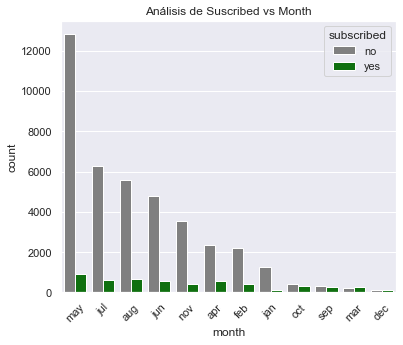

,month,subscribed_x,subscribed_y,proportion_subscribed
7,mar,248,477,0.519916
2,dec,100,214,0.467290
11,sep,269,579,0.464594
10,oct,323,738,0.437669
0,apr,577,2932,0.196794
3,feb,441,2649,0.166478
1,aug,688,6247,0.110133
6,jun,546,5341,0.102228
9,nov,403,3970,0.101511
4,jan,142,1403,0.101212


In [45]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
month = sns.countplot(x="month", data = train, hue = "subscribed",  palette=colors, order = train["month"].value_counts().index)
month.tick_params(axis='x', rotation=45)
plt.title("Análisis de Suscribed vs Month")
plt.show()

#Vemos la proporcion de depositos suscritos
total=train.groupby(['month']).subscribed.count()
parcial=train[train.subscribed=='yes'].groupby(['month']).subscribed.count()

df_proportion_month = pd.merge(parcial, total, how='left', on=['month']).reset_index()
df_proportion_month['proportion_subscribed'] = df_proportion_month['subscribed_x'] / df_proportion_month['subscribed_y']
df_proportion_month.sort_values('proportion_subscribed', ascending=False)

Mayo es el mes con más contactos a los clientes, pero en general, podemos observar que, el verano es el periodo en el que más se ha contactado con los clientes durante la campaña. En contra posición a los meses de invierno, que es cuando menos contactos se han hecho.
La variable respuesta, subscribed, aumenta la proporción de "yes" en marzo, septiembre y octubre y diciembre. Sin embargo, esta conclusión no podemos valorarla bien porque en esos meses hay muy poco volumen.

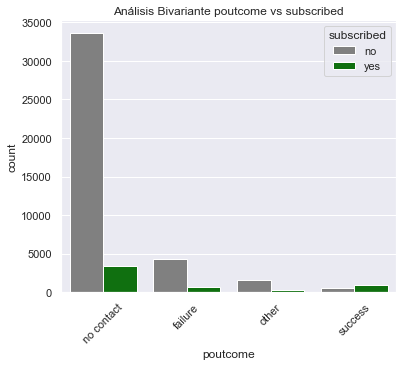

,poutcome,subscribed_x,subscribed_y,proportion_subscribed
3,success,978,1511,0.647253
2,other,309,1845,0.167480
0,failure,618,4901,0.126097
1,no contact,3384,36954,0.091573


In [46]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
poutcome = sns.countplot(x="poutcome", data = train, hue = "subscribed",  palette=colors, order = train["poutcome"].value_counts().index)
poutcome.tick_params(axis='x', rotation=45)
plt.title("Análisis Bivariante poutcome vs subscribed")
plt.show()


#Vemos la proporcion de depositos suscritos
total=train.groupby(['poutcome']).subscribed.count()
parcial=train[train.subscribed=='yes'].groupby(['poutcome']).subscribed.count()

df_proportion_pout = pd.merge(parcial, total, how='left', on=['poutcome']).reset_index()
df_proportion_pout['proportion_subscribed'] = df_proportion_pout['subscribed_x'] / df_proportion_pout['subscribed_y']
df_proportion_pout.sort_values('proportion_subscribed', ascending=False)

La mayoría de los clientes no conocían la campaña previa realizada. Los que si la conocían y fueron impactados con éxito, suscribieron más el depósito. Esta variable también la vamos a omitir en el estudio porque tiene muy pocos datos de valor conocido, por lo que no tenemos volumen suficiente para que sea representativa.

### Análisis Variables Numéricas

Analizamos la correlación entre variables numéricas

In [47]:
#Incluimos la variable respuesta tipo numérica (nombre asignado: y) para poder estudiarla en la matriz de correlaciones
train.loc[(train.subscribed == "yes"),"y"] = 1 # 0 means subscribed no 1 means yes
train.loc[(train.subscribed == "no") ,"y"] = 0

plt.subplots(nrows=1, ncols=1, figsize=(40, 40))

sns.heatmap(
    df_encoded.corr(numeric_only = True),
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 18},
    linewidths = 1,
    vmin      = -1,
    vmax      = 1,
    cmap = 'Greens',
    mask = np.triu(df_encoded.corr()),
    square    = True
)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Matriz de Correlaciones", fontsize=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


C:\Users\laura\AppData\Local\Temp\ipykernel_26264\3416114788.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(train.corr()),


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'balance'),
  Text(0, 2.5, 'day'),
  Text(0, 3.5, 'duration'),
  Text(0, 4.5, 'campaign'),
  Text(0, 5.5, 'pdays'),
  Text(0, 6.5, 'previous'),
  Text(0, 7.5, 'y')])

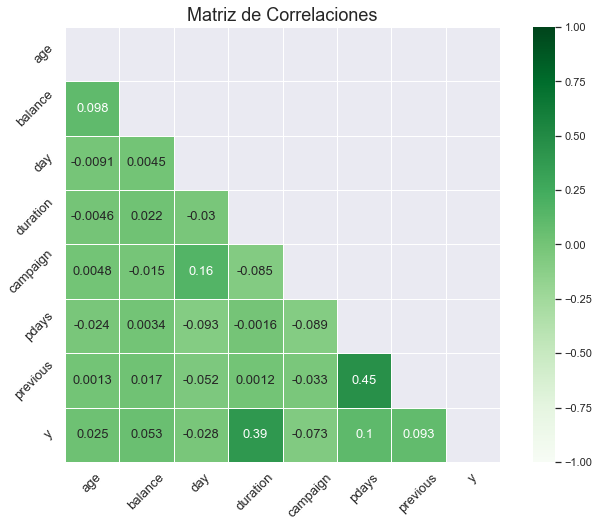

In [48]:
plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

sns.heatmap(
    train.corr(numeric_only = True),
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 13},
    linewidths = 1,
    vmin      = -1,
    vmax      = 1,
    cmap = 'Greens',
    mask = np.triu(train.corr()),
    square    = True
)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Matriz de Correlaciones", fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

Viendo la matriz de correlación, podemos observar lo siguiente:
- La variable duración de la llamada de la campaña en segundos influye en que el cliente suscriba el depósito con relación directa.
- Previous y pdays están correlacionadas positivamente. Esto es evidente, ya que guardan relación, porque indican cuantas campañas previas se han realizado a un cliente concreto y cuantos días hace desde ese último contacto (si lo hubo) respectivamente.
- Campaña también se correlaciona con día, siendo campaña cuantos impactos ha tenido un cliente en esta campaña y día el día del mes del último contacto.
- Balance anual de la cuenta se relaciona con la edad, los clientes con mayor edad tienden a saldos medios anuales positivos

Ahora vemos la relación entre las variables cuantitativas dos a dos y de forma individual en la diagonal, estudiándolas en función de la variable respuesta

In [49]:
train.groupby('subscribed').median()

C:\Users\laura\AppData\Local\Temp\ipykernel_26264\2528394609.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('subscribed').median()


,age,balance,day,duration,campaign,pdays,previous,y
subscribed,,,,,,,,
no,39.0,417.0,16.0,164.0,2.0,-1.0,0.0,0.0
yes,38.0,733.0,15.0,426.0,2.0,-1.0,0.0,1.0


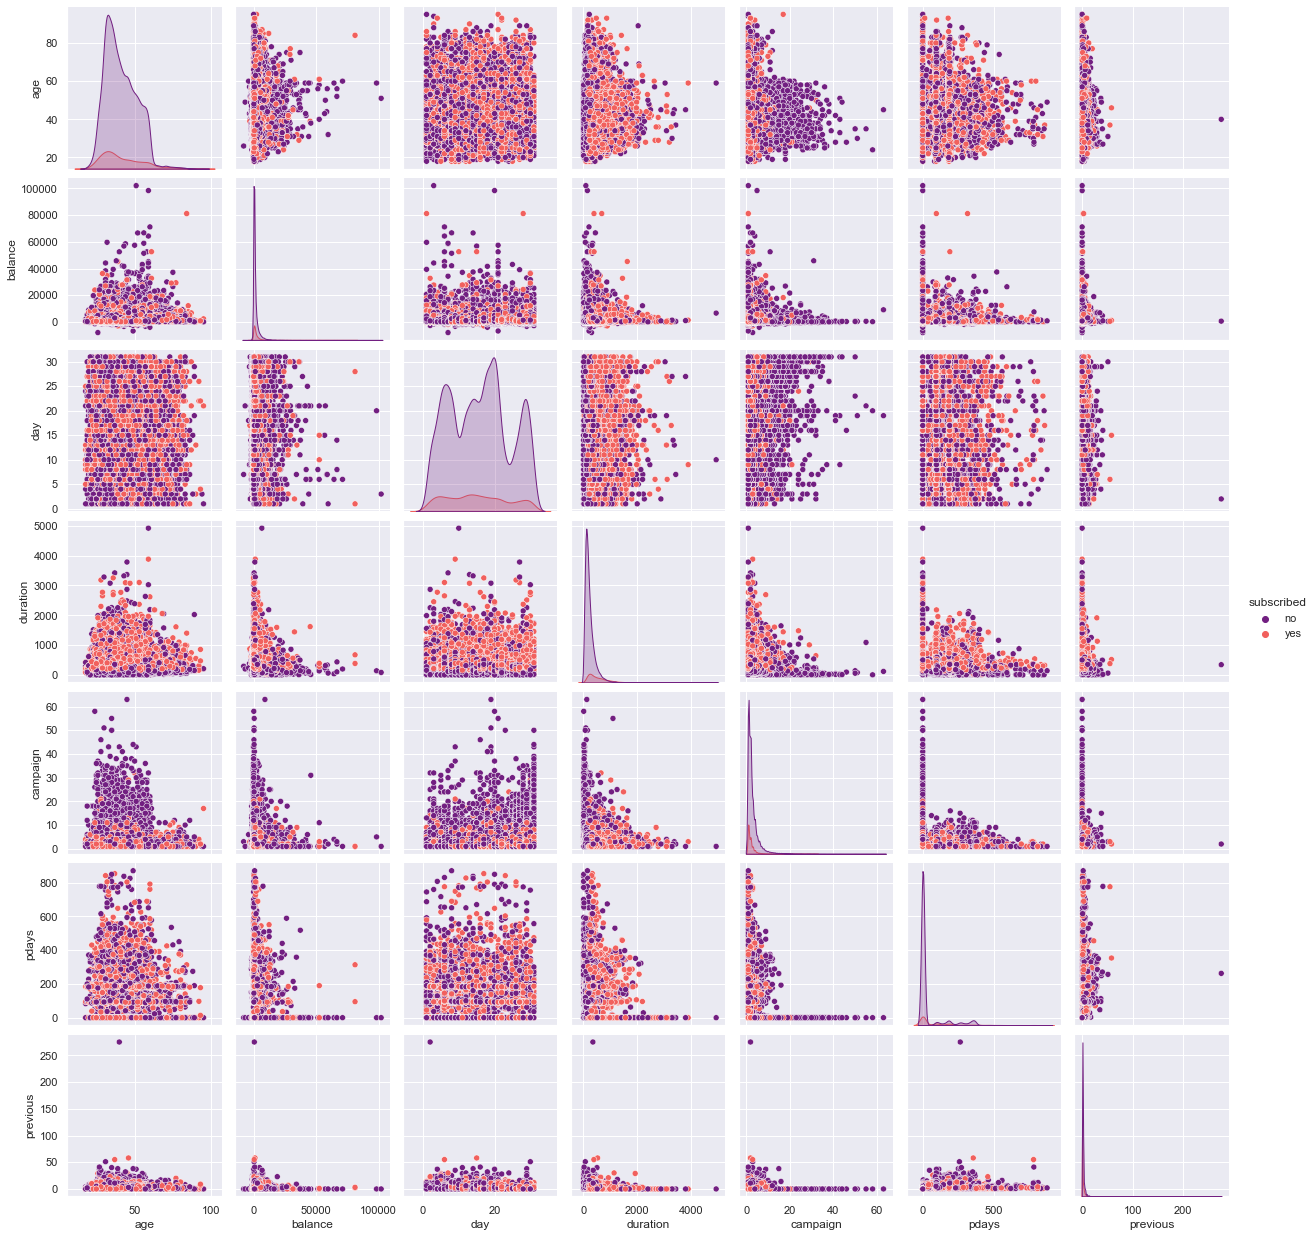

In [50]:
sns.set()
cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous','subscribed']
sns.pairplot(train[cols], hue="subscribed", palette='magma')

plt.show()

Incluimos algún estudio dos a dos independiente de las variables que nos resultan más interesantes:

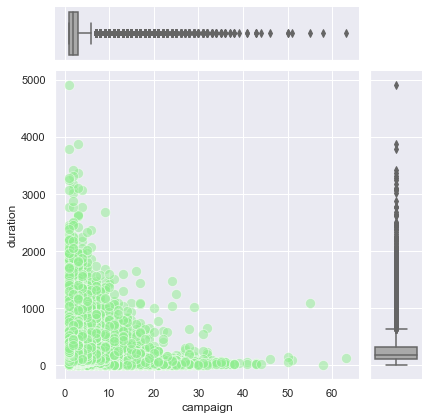

In [51]:
g = sns.JointGrid(data=train, x="campaign", y="duration")
g.plot_joint(sns.scatterplot, s=100, alpha=.5, color='lightgreen')
g.plot_marginals(sns.boxplot, color='darkgrey')

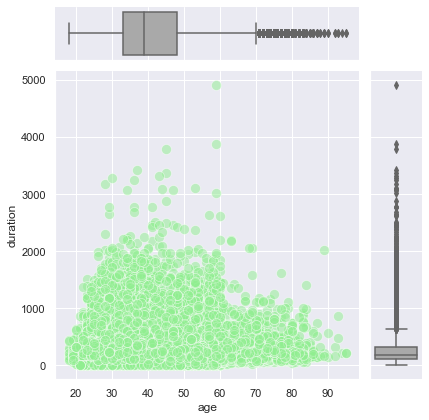

In [52]:
g = sns.JointGrid(data=train, x="age", y="duration")
g.plot_joint(sns.scatterplot, s=100, alpha=.5, color='lightgreen')
g.plot_marginals(sns.boxplot, color='darkgrey')

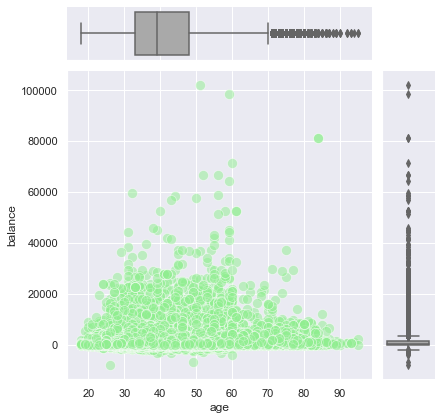

In [53]:
g = sns.JointGrid(data=train, x="age", y="balance")
g.plot_joint(sns.scatterplot, s=100, alpha=.5, color='lightgreen')
g.plot_marginals(sns.boxplot, color='darkgrey')

Conclusiones que extraemos de estas variables. Primero observamos cada variable con respecto a las otras:
- La edad es independiente de todas las variables, excepto del número de contactos en esta campaña y la duración de dichos contactos, que podemos observar como disminuyen conforme aumenta la edad
- Respecto a los saldos medios anuales parecen no tener dependencia con ninguna variable numérica. En la edad si podemos ver que a edades tempranas o muy maduras, los saldos son menores.
- El día de la campaña es independiente a todo, distribución casi uniforme
- La duración de las llamadas aumenta cuantos menos contactos se hacen al cliente con la campaña. También podemos observar como entre la gente más joven las llamadas son de menor duración.

Ahora observamos la relación contra la variable respuesta, si suscriben o no el depósito a plazo:
- La edad de la gente que suscribe el depósito se concentra entre los 20 y los 55 años aproximadamente, con un pico en los 40. La distribución podría aproximarse a una normal.
- El saldo medio anual tiene una distribución con cola a la derecha (asimetría positiva).
- El día del mes de lanzamiento de la última campaña tiene una distribución aproximadamente uniforme.
- La duración de las llamadas en la campaña tiene cola a la derecha (asimetría positiva). Una mayor duración de las llamadas, parece inducir a más suscripción de un depósito a plazo.
- Con las variables, campañas, pdays y previous ocurre esto mismo, distribución asimétrica positiva. De estas variables sólo es reseñable, que un menor número de contactos en esta campaña es más eficaz para la suscripción de un depósito.

En general se observa mucho solapamiento, no hay correlación. Las variables tienen muchos outliers, sobre todo por arriba, mucha dispersión.

### Análisis multivariante

En este punto vamos a coger las variables numéricas y categóricas que parecen más significativas y que podrían tener relación para sacar conclusiones adicionales.

<AxesSubplot:xlabel='balance', ylabel='job'>

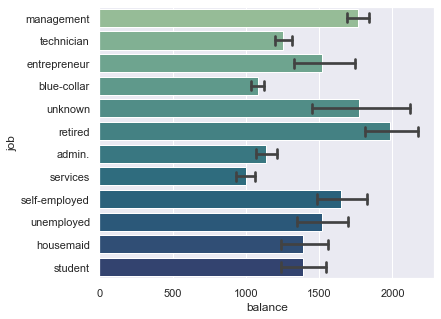

In [54]:
sns.barplot(
    data=train, x="balance", y="job",
     capsize=.4, palette= 'crest'
)

Tienen un saldo medio anual más bajo el sector servicios, los obreros, los administrativos y los técnicos. Los trabajos que se relacionan con saldos anuales mayores tienen mayor varianza (más dispersos)

<AxesSubplot:xlabel='marital', ylabel='balance'>

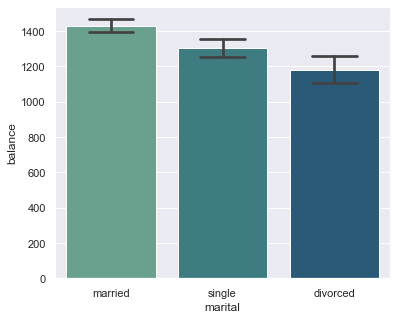

In [55]:
sns.barplot(
    data=train, y="balance", x="marital",
     capsize=.4, palette= 'crest'
)

Los clientes que están casados tienen saldos medios anuales superiores a los solteros, y estos a su vez mayor que los divorciados.

<AxesSubplot:xlabel='default', ylabel='balance'>

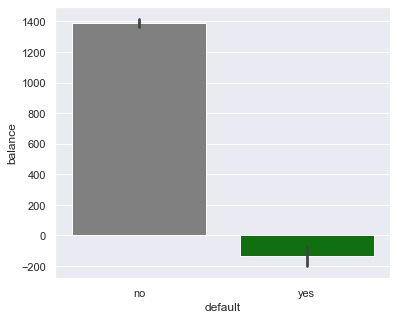

In [56]:
sns.barplot(data=train, x="default", y="balance", palette=colors)

Los clientes con mora de crédito tienen saldos medios anuales negativos

<AxesSubplot:xlabel='housing', ylabel='balance'>

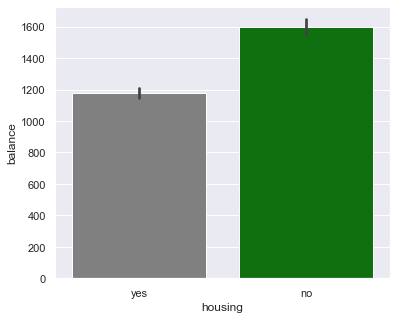

In [57]:
sns.barplot(data=train, x="housing", y="balance", palette=colors)

Los clientes sin hipoteca tienen saldos medios anuales mayores

<AxesSubplot:xlabel='loan', ylabel='balance'>

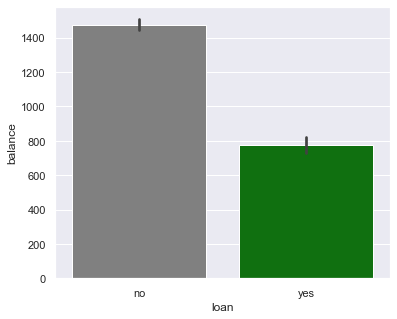

In [58]:
sns.barplot(data=train, x="loan", y="balance", palette=colors)

Los clientes con créditos pesonales tienen saldos medios anuales menores que los clientes que no tienen préstamos personales

<AxesSubplot:xlabel='subscribed', ylabel='balance'>

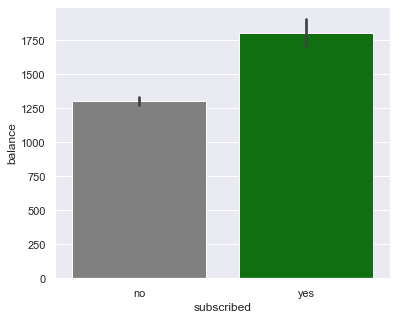

In [59]:
sns.barplot(data=train, x="subscribed", y="balance", palette=colors)

Los clientes con mayores saldos anuales suscriben más créditos.

<AxesSubplot:xlabel='contact', ylabel='duration'>

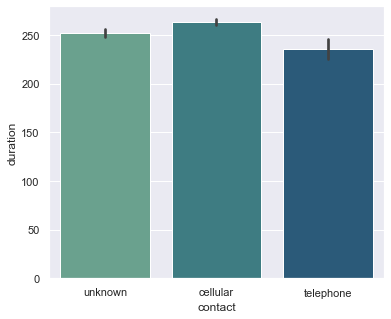

In [60]:
sns.barplot(data=train, x="contact", y="duration", palette='crest')

La duración del contacto es independiente el tipo (medio) de contacto en la campaña

### Conclusiones

**Teniendo en cuenta las características del cliente:**

- Aumenta la proporción de depósitos suscritos cuando el cliente tiene más de 35 años.
- Cuando es jubilado, estudiante o tiene cargos de gestión de empresas y, por consiguiente, cuanto más formado esté.
- Además, a mayor saldo anual medio, más depósitos suscritos. Entendemos que se trata de gente con buena capacidad económica.
- Disminuye la proporción de depósitos suscritos cuando los clientes tienen préstamos personales, hipotecas o moras de crédito.
- También, disminuyen cuando los clientes trabajan por cuenta propia (empresario)

**En cuanto a la campaña realizada:**

Podemos extraer la conclusión de que es más eficaz menos impactos en una campaña, con una comunicación más exhaustiva y duradera en el tiempo, aunque esto último depende a su vez de la edad de los clientes, ya que gente más joven requiere menor tiempo.

Además, la mayoría de clientes no han sido impactados con otras campañas anteriores, pero los que si que lo han sido, suscriben más créditos si la campaña fue un éxito.

*Excluimos de aquí en adelante las variables: day y contact, debido a que no aportan valor a la variable respuesta o/y tienen bastantes datos con valor desconocido.*


La variable contact vemos que aunque el cliente haya recibido campañas ahora (todos han sido contactados) tenemos muchos valores desconocidos.

In [61]:
train[train.campaign==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,age_group,y


In [62]:
train[train.campaign>0].groupby('contact').contact.count()

contact
cellular     29285
telephone     2906
unknown      13020
Name: contact, dtype: int64

Como comentábamos la variable day, tiene una distribución casi uniforme y no se ve variación de la variable respuesta en función del día de la campaña

<AxesSubplot:xlabel='day', ylabel='count'>

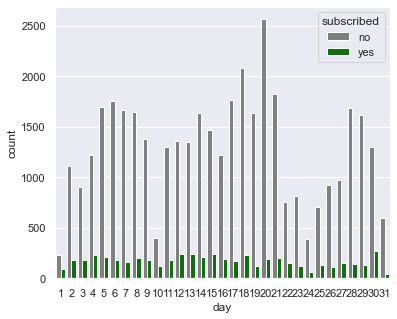

In [63]:
sns.countplot(data=train, x="day", hue="subscribed", palette=colors)

In [64]:
df_encoded.drop(columns = ["contact", "day"],inplace = True)
df_encoded

,age,education,default,balance,housing,loan,duration,campaign,pdays,previous,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,entre 18 y 35 años,entre 36 y 55 años,mayores de 55 años,month_num
0,58,3,0,2143,1,0,261,1,-1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0
1,44,2,0,29,1,0,151,1,-1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0
2,33,2,0,2,1,1,76,1,-1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0
3,47,0,0,1506,1,0,92,1,-1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0
4,33,0,0,1,0,0,198,1,-1,0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,0,825,0,0,977,3,-1,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11.0
45207,71,1,0,1729,0,0,456,2,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,11.0
45208,72,2,0,5715,0,0,1127,5,184,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0
45209,57,2,0,668,0,0,508,4,-1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0


## MODELOS

### REDUCCION DE LA DIMENSIONALIDAD

Cuando aumenta la dimensionalidad, el volumen del espacio aumenta exponencialmente haciendo que los datos disponibles se vuelven dispersos. Esta dispersión es problemática para cualquier método que requiera significación estadística.

Las técnicas de reducción de la dimensionalidad buscan preservar la información más relevante y significativa de los datos, mientras se elimina la información redundante o menos relevante.
Tipos:
- La selección de características, que selecciona un subconjunto de características relevantes para el análisis
- La extracción de características, que transforma los datos originales en un conjunto de características nuevas y más compactas. Vamos a probar las siguientes:
    - PCA (Análisis de componentes principales): es un algortimo lineal que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información.
    - t-SNE (T-distributed Stochastic Neighbor Embedding): es una técnica de reducción no lineal para transformar datos de alta dimensión en una representación de baja dimensión. Traslada los puntos de una dimensión superior a una dimensión inferior tratando de preservar el vecindario de ese punto.
    - MDS (Escalado Multidimensional): se utiliza para proyectar datos de alta dimensión en un espacio de menor dimensión mientras se preservan las distancias por pares entre los puntos de datos tanto como sea posible. MDS se basa en el concepto de distancia y tiene como objetivo encontrar una proyección de los datos que minimice las diferencias entre las distancias en el espacio original y las distancias en el espacio de menor dimensión.

#### PCA

El método PCA permite “condensar” la información aportada por múltiples variables en solo unas pocas componentes.
¿Cuánta información presente en el set de datos original se pierde al proyectar las observaciones en un espacio de menor dimensión? ¿Cuanta información es capaz de capturar cada una de las componentes principales obtenidas? Para contestar a estas preguntas se recurre a la proporción de varianza explicada por cada componente principal.

In [65]:
#Separamos las características de la variable objetivo, ya que queremos reducir las variables explicativas del modelo
X = df_encoded.drop('subscribed', axis=1)
y = df_encoded['subscribed']

In [66]:
#Normalizamos las variables. En la técnica PCA las variables deben estar normalizadas ya que se buca la varianza máxima de los datos. Por ello, si no se normaliza, dominaran las variables con rasgos más amplios. es importante para asegurar que todas las variables contribuyan por igual a la varianza total
X_nor = StandardScaler().fit_transform(X)

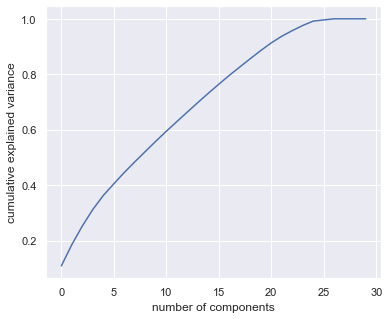

In [67]:
#Aplicamos PCA por defecto para ver la varianza acumulada que se explica en función del número de compnentes
pca_ = PCA()
pca_global = pca_.fit(X_nor)

plt.plot(np.cumsum(pca_global.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Se ven codos en 4 componentes, pero la explicabilidad acumulada de varianza es muy baja. Vemos como a partir de 20 variables también cambia la tendencia, pero es un número muy alto de componentes. Por ello, decidimos coger el número de variables que explican un 70% de la varianza.

In [68]:
#Aplicamos PCA de froma que nos de el número de componentes necesario que representan el 70% de la varianza
pca = PCA(n_components=0.7)
components = pca.fit_transform(X_nor)

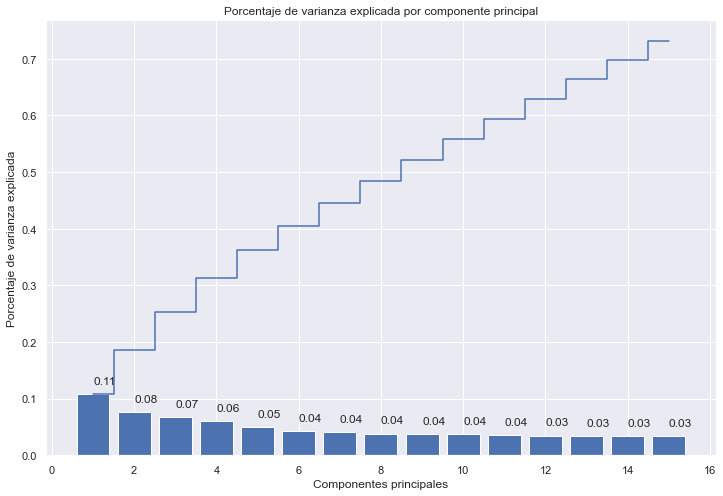

In [69]:
#Representación gráfica
var_ratios = list(pca.explained_variance_ratio_)
cumulative_var = list(np.cumsum(pca.explained_variance_ratio_))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = var_ratios
)

for x, y in zip(np.arange(len(pd.DataFrame(df_encoded).columns)) + 1, var_ratios):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
    )

ax.step(np.arange(pca.n_components_) + 1, cumulative_var, where='mid')

plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.title('Porcentaje de varianza explicada por componente principal')
plt.show()

In [70]:
#Creamos el Dataset resultado de la PCA
X_pca = pd.DataFrame(components)
#Componentes principales + Variable respuesta
df_pca = pd.concat([X_pca, df_encoded['subscribed']], axis=1)

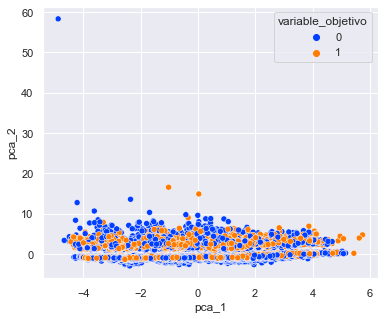

In [71]:
#Para representarlo lo into en 2D
pca_2comp = PCA(n_components=2)
components_2D = pca_2comp.fit_transform(X_nor)

pca_df = pd.DataFrame(components_2D, columns=['pca_1', 'pca_2'])
pca_df['variable_objetivo'] = df_encoded['subscribed']

sns.scatterplot(data=pca_df, x='pca_1', y='pca_2', hue='variable_objetivo', palette='bright')
plt.show()

No se ven grupos separados esto podría implicar que los datos no presentan una estructura subyacente clara o que la técnica de reducción de dimensionalidad no es la adecuada para el conjunto de datos. Además, necesitamos un gran número de componentes para explicar suficiente variabilidad.
PCA, tiene algunas limitaciones, solo tiene en cuenta combinaciones lineales de las variables originales.

#### TSNE

El algoritmo de t-SNE calcula la probabilidad condicional de cada par de observaciones y trata de minimizar la suma de las diferencias entre las probabilidades de la dimensión superior e inferior.

In [72]:
#En primer lugar, probamos pasando el conjunto completo. E el caso de TSNE no neecsita que las variables estén previamente normalizadas ya que se basa en similitud entre puntos
tsne = TSNE(n_components=2, random_state=0, n_iter=1000)
X_tsne = tsne.fit_transform(X)

C:\Users\laura\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\laura\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


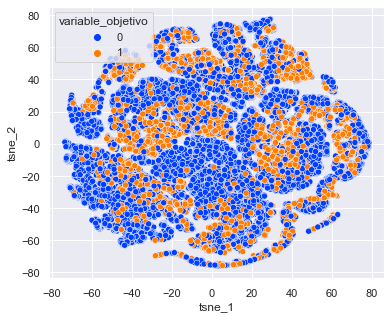

In [73]:
# Crear un DataFrame con los resultados de t-SNE
tsne_df = pd.DataFrame(X_tsne, columns=['tsne_1', 'tsne_2'])
tsne_df['variable_objetivo'] = df_encoded['subscribed']

# Grafico
sns.scatterplot(data=tsne_df, x='tsne_1', y='tsne_2', hue='variable_objetivo', palette='bright')
plt.show()

No se aprecian grupos claramente diferenciados utilizando esta técnica sobre el dataset completo. Aunque si parece que se separa la variable respuesta 0 de la 1.

C:\Users\laura\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\laura\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


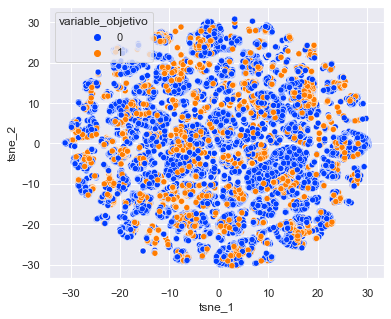

In [74]:
#Probamos usando como entrada de TSNE la salida del PCA, Dataset ya reducido que contiene el 70% de la varianza del original
tsne = TSNE(n_components=2, random_state=0, n_iter=500)
X_tsne_pca = tsne.fit_transform(X_pca)

#Dataset de salida TSNE
tsne_pca_df = pd.DataFrame(X_tsne_pca, columns=['tsne_1', 'tsne_2'])
tsne_pca_df['variable_objetivo'] = df_encoded['subscribed']

# Grafico
sns.scatterplot(data=tsne_pca_df, x='tsne_1', y='tsne_2', hue='variable_objetivo', palette='bright')
plt.show()

No se observa nada, tampoco respecto a la variable respuesta del dataset

El algortimo TSNE tiene algunas desventajas como su baja interpretación, determinismo y que esta diseñado para reducir a 2 o 3 dimensiones unicamente. Es muy bueno para la visualización.

#### MDS

MDS se usa comúnmente para visualizar datos complejos, no lineales y de alta dimensión, y para identificar patrones y relaciones que pueden no ser evidentes en el espacio original. Se puede aplicar a una amplia gama de tipos de datos, incluidos datos numéricos, categóricos y mixtos. Se basa en medir distancias.

MDS con los valores por defecto

In [75]:
#Tenemos que coger una muestra del dataset normalizado porque es un algoritmo muy costoso y en muchos casos da incluso error de memoria
#Se usa normalizado porque se miden distancias en este algoritmo
sample_4K = X_nor[np.random.choice(X_nor.shape[0], size=4000, replace=False)]

In [76]:
# Crear objeto MDS y ajustarlo a los datos. Valores por defecto (euclideo, 4 inicializaciones, 300 iteraciones).
#Reduzco iteraciones para que no tarde tanto
mds_s = MDS(n_components=2, max_iter=10)
mds_simple = mds_s.fit_transform(sample_4K)

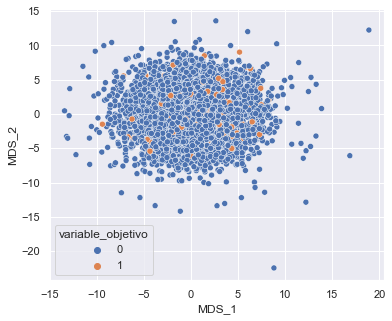

In [77]:
#Saco el dataset obtenido de MDS por defecto
mds_s_df = pd.DataFrame(mds_simple, columns=['MDS_1', 'MDS_2'])
mds_s_df['variable_objetivo'] = df_encoded['subscribed']
sns.scatterplot(x='MDS_1', y='MDS_2', hue='variable_objetivo', data=mds_s_df)
plt.show()

Aplicamos MDS con matriz de correlaciones. A partir de esta matriz de similitud, se puede generar una representación visual del conjunto de datos en un espacio de menor dimensión, donde la distancia entre los objetos en el espacio refleja la similitud entre ellos en la matriz de similitud de correlaciones.

In [78]:
mds_c = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
#Calculo de la matriz de similitud de correlaciones
X_pd_nor = pd.DataFrame(X_nor)
matriz_similitud = 1 - X_pd_nor.corr()

# Aplicar MDS a la matriz de similitud
mds_corr = mds_c.fit_transform(matriz_similitud)

In [79]:
#Dataframe
mds_corr_df = pd.DataFrame(mds_corr, columns=['MDS_1', 'MDS_2'])
mds_corr_df['variable_objetivo'] = df_encoded['subscribed']
mds_corr_df

,MDS_1,MDS_2,variable_objetivo
0,0.502339,-0.584512,0
1,0.040153,0.735677,0
2,-0.149806,0.095749,0
3,0.234020,-0.033041,0
4,-0.729033,0.049247,0
5,-0.115017,-0.367651,0
6,-0.338914,0.263657,0
7,0.360230,0.509459,0
8,-0.669162,-0.382944,0
9,-0.534908,-0.374017,0


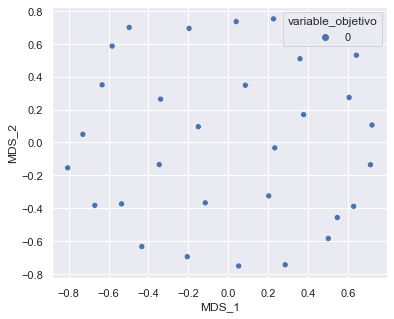

In [80]:
#Grafico
sns.scatterplot(x='MDS_1', y='MDS_2', hue='variable_objetivo', data=mds_corr_df)
plt.show()

Esta distancia de correlación no sirve para los datos por estar desbalanceados

MDS distancias euclideas

In [92]:
#Distancias euclideas precomputado y con más iteraciones. A igualdad de iteraciones mismo resultado que el de por defecto (primer caso)
from sklearn.metrics import euclidean_distances
similar_eucl = euclidean_distances(sample_4K)

# Crear objeto MDS y ajustarlo a los datos
mds = MDS(n_components=2, dissimilarity='precomputed', max_iter=100)
mds_eu = mds.fit_transform(similar_eucl)

In [90]:
#Guardamos el dataset resultado de la reducción con dist. euclidea
mds_eu_df = pd.DataFrame(mds_eu, columns=['MDS_1', 'MDS_2'])
mds_eu_df['variable_objetivo'] = df_encoded['subscribed']

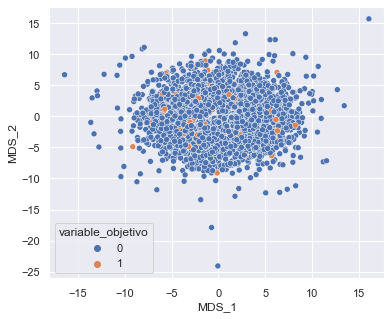

In [91]:
#Grafico
sns.scatterplot(x='MDS_1', y='MDS_2', hue='variable_objetivo', data=mds_eu_df)
plt.show()

MDS no metrico. Las diferencias 0, las toma como valores faltantes. Generalmente se usa con variables ordinales

In [84]:
#MDS no metric
mds_nm = MDS(n_components=2, metric=False, random_state=1)
# Calculamos la matriz de similitud no métrica. Cogemos la muestra de 4K porque sino falla por memoria
nometric_mds = mds_nm.fit_transform(sample_4K)


In [93]:
#DataFrame
nometric_mds_df = pd.DataFrame(nometric_mds, columns=['MDS_1', 'MDS_2'])
nometric_mds_df['variable_objetivo'] = df_encoded['subscribed']

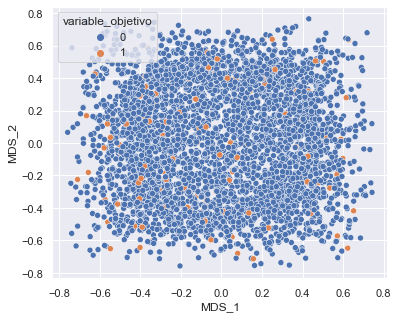

In [94]:
#Grafico
sns.scatterplot(x='MDS_1', y='MDS_2', hue='variable_objetivo', data=nometric_mds_df)
plt.show()

MDS ds sensible a valores atípicos y ruido en los datos.
Es una técnica de optimización global, lo que significa que encuentra una única proyección que es óptima para todo el conjunto de datos, no se adapta bien a datos multimodales

Si el objetivo es encontrar patrones generales y reducir la complejidad de los datos, PCA puede ser una buena opción. Si el objetivo es visualizar estructuras complejas en los datos y preservar la estructura de clusters, t-SNE puede ser más apropiado. Si el objetivo es explorar y visualizar la estructura subyacente de los datos, la MDS puede ser una buena opción.

En general, deducimos de las técnicas aplicadas que no parece que se pueda reducir la dimensión de este dataset.
Puede ser que los datos no contengan estructura suficiente para poder ser visualizados de manera efectiva, aunque con TSNE aplciado sobre los datos originales se obtenían mejores vidualizaciones.
 También es posible que los datos estén demasiado ruidosos o que contengan demasiada variabilidad para poder ser resumidos de manera efectiva en un espacio de menor dimensión.